indexing IC-CX-00001-01.isyntax
indexing IC-CX-00002-01.isyntax
indexing IC-CX-00004-01.isyntax
indexing IC-CX-00005-01.isyntax
indexing IC-CX-00006-02.isyntax
indexing IC-CX-00008-01.isyntax
indexing IC-CX-00010-01.isyntax
indexing IC-CX-00014-01.isyntax
indexing IC-CX-00020-01.isyntax
indexing IC-EN-02079-01.isyntax
indexing IC-EN-02081-01.isyntax
indexing IC-EN-02084-01.isyntax
indexing IC-EN-02086-01.isyntax
indexing IC-EN-02089-01.isyntax
indexing IC-EN-02092-01.isyntax
indexing IC-EN-02095-01.isyntax
Saving /home/ubuntu/repath/experiments/tissue/Greyscale/truth/images/IC-CX-00001-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Greyscale/truth/images/IC-CX-00002-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Greyscale/truth/images/IC-CX-00004-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Greyscale/truth/images/IC-CX-00005-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Greyscale/truth/images/IC-CX-00006-02.csv
Saving /home/ubuntu/repath/experiments/tissue/Gr

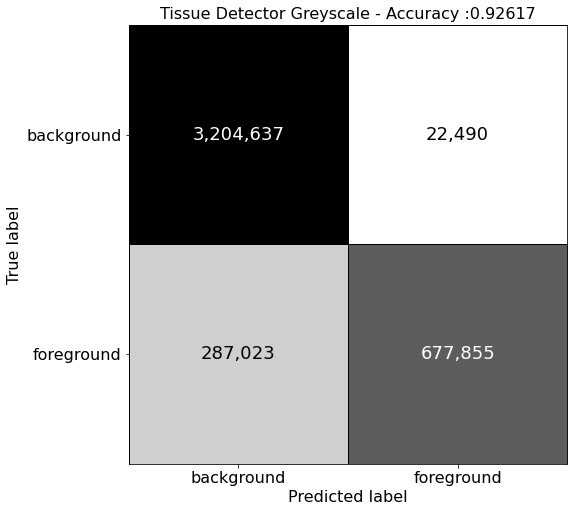

In [1]:
from repath.experiments.tissuedet import *

greyscale()

In [2]:
otsu()

indexing IC-CX-00001-01.isyntax
indexing IC-CX-00002-01.isyntax
indexing IC-CX-00004-01.isyntax
indexing IC-CX-00005-01.isyntax
indexing IC-CX-00006-02.isyntax
indexing IC-CX-00008-01.isyntax
indexing IC-CX-00010-01.isyntax
indexing IC-CX-00014-01.isyntax
indexing IC-CX-00020-01.isyntax
indexing IC-EN-02079-01.isyntax
indexing IC-EN-02081-01.isyntax
indexing IC-EN-02084-01.isyntax
indexing IC-EN-02086-01.isyntax
indexing IC-EN-02089-01.isyntax
indexing IC-EN-02092-01.isyntax
indexing IC-EN-02095-01.isyntax
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-00001-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-00002-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-00004-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-00005-01.csv
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-00006-02.csv
Saving /home/ubuntu/repath/experiments/tissue/Otsu/truth/images/IC-CX-000

KeyboardInterrupt: 

In [ ]:
from repath.experiments.tissuedet import *

greyscale_closing()

In [ ]:
import repath.data.datasets.tissue as tissue
from repath.preprocess.patching import GridPatchFinder, SlidesIndex, CombinedIndex
from repath.preprocess.tissue_detection import TissueDetector, TissueDetectorGreyScale, TissueDetectorAll, TissueDetectorOTSU
from repath.utils.metrics import conf_mat_plot_heatmap
from repath.utils.paths import project_root
from repath.utils.seeds import set_seed

"""
Global stuff
"""
experiment_name = "tissue"
experiment_root = project_root() / "experiments" / experiment_name

global_seed = 123

In [ ]:
set_seed(global_seed)
tissue_dataset = tissue.tissue()



In [ ]:
tissue_dataset[0]

In [ ]:
slide_path = tissue_dataset[0][0]
slide_path

In [ ]:
from repath.data.slides.isyntax import Slide

with Slide(slide_path, 0) as slide:
    thumb = slide.get_thumbnail(7)

In [ ]:
from PIL import Image
Image.fromarray(thumb)

In [ ]:
annotation_path = tissue_dataset[0][1]
annotation_path

In [ ]:
import numpy as np
from repath.utils.convert import np_to_pil

annotations = tissue_dataset.load_annotations(annotation_path).render((thumb.shape[0], thumb.shape[1]), 2**7)

Image.fromarray(np.array(annotations*255, dtype=np.uint8))

In [ ]:
annot_mask = np.array(annotations, dtype=np.bool)
annot_mask = np.expand_dims(annot_mask, axis=-1)
thumb_masked = np.where(annot_mask, thumb, 0)
thumb_inverse = np.where(np.logical_not(annot_mask), thumb, 0)

In [ ]:
Image.fromarray(thumb_masked)

In [ ]:
Image.fromarray(thumb_inverse)

In [ ]:
from repath.experiments.tissuedet import *

greyscale()

In [ ]:
base_dir = '/home/ubuntu/repath/experiments/tissue/Greyscale/'
truth_index = pd.read_csv(base_dir + 'truth/index.csv')
detection_index = pd.read_csv(base_dir + 'tissue_detection/index.csv')
detection_index

In [ ]:
idx = 0

In [ ]:
true_patches = pd.read_csv(truth_index.csv_path[idx])
detected_patches = pd.read_csv(detection_index.csv_path[idx])
patch_size = detection_index.patch_size[idx]

In [ ]:
true_patches['col'] = true_patches.x.divide(patch_size)
true_patches['row'] = true_patches.y.divide(patch_size)
detected_patches['col'] = detected_patches.x.divide(patch_size)
detected_patches['row'] = detected_patches.y.divide(patch_size)
true_patches

In [ ]:
def to_thumbnail_tissue(df_in, col_name: str) -> np.array:
    max_rows = int(np.max(df_in.row)) + 1
    max_cols = int(np.max(df_in.col)) + 1

    # create a blank thumbnail
    thumbnail_out = np.zeros((max_rows, max_cols))
    df_out = df_in[df_in[col_name] > 0]

    # for each row in dataframe set the value of the pixel specified by row and column to the probability in clazz
    for rw in range(df_out.shape[0]):
        df_row = df_out.iloc[rw]
        thumbnail_out[int(df_row.row), int(df_row.col)] = df_row[col_name]

    return thumbnail_out

In [ ]:
tiss_np = np.array(to_thumbnail_tissue(true_patches, 'label'), dtype=bool)
dets_np = np.array(to_thumbnail_tissue(detected_patches, 'label'), dtype=bool)
Image.fromarray(np.array(dets_np*255, dtype=np.uint8))

In [ ]:
tp_arr = np.expand_dims(np.logical_and(tiss_np, dets_np), axis=-1)
fp_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), dets_np), axis=-1)
fn_arr = np.expand_dims(np.logical_and(np.logical_not(dets_np), tiss_np), axis=-1)
tn_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), np.logical_not(dets_np)), axis=-1)

color_result = np.zeros((tiss_np.shape[0], tiss_np.shape[1], 3))
color_result = np.where(tp_arr, [255, 255, 255], color_result)
color_result = np.where(fp_arr, [0, 0, 255], color_result)
color_result = np.where(fn_arr, [255, 0, 0], color_result)
color_result = np.where(tn_arr, [0, 0, 0], color_result)
Image.fromarray(np.array(color_result, dtype=np.uint8))

In [ ]:
def colour_slide_output(true_path, detection_path, patch_size):
    def to_thumbnail_tissue(df_in, col_name: str) -> np.array:
        max_rows = int(np.max(df_in.row)) + 1
        max_cols = int(np.max(df_in.col)) + 1

        # create a blank thumbnail
        thumbnail_out = np.zeros((max_rows, max_cols))
        df_out = df_in[df_in[col_name] > 0]

        # for each row in dataframe set the value of the pixel specified by row and column to the probability in clazz
        for rw in range(df_out.shape[0]):
            df_row = df_out.iloc[rw]
            thumbnail_out[int(df_row.row), int(df_row.col)] = df_row[col_name]

        return thumbnail_out
    
    true_patches = pd.read_csv(true_path)
    detected_patches = pd.read_csv(detection_path)
    
    # change x y from zero level positions to pthumbnail level size
    true_patches['col'] = true_patches.x.divide(patch_size)
    true_patches['row'] = true_patches.y.divide(patch_size)
    detected_patches['col'] = detected_patches.x.divide(patch_size)
    detected_patches['row'] = detected_patches.y.divide(patch_size)
    
    # create thumbnails from the patch indexes
    tiss_np = np.array(to_thumbnail_tissue(true_patches, 'label'), dtype=bool)
    dets_np = np.array(to_thumbnail_tissue(detected_patches, 'label'), dtype=bool)
    
    # work out tp, fp etc arrays
    tp_arr = np.expand_dims(np.logical_and(tiss_np, dets_np), axis=-1)
    fp_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), dets_np), axis=-1)
    fn_arr = np.expand_dims(np.logical_and(np.logical_not(dets_np), tiss_np), axis=-1)
    tn_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), np.logical_not(dets_np)), axis=-1)
    
    # create a coloured ouput array
    color_result = np.zeros((tiss_np.shape[0], tiss_np.shape[1], 3))
    color_result = np.where(tp_arr, [255, 255, 255], color_result)
    color_result = np.where(fp_arr, [0, 0, 255], color_result)
    color_result = np.where(fn_arr, [255, 0, 0], color_result)
    color_result = np.where(tn_arr, [0, 0, 0], color_result)
    
    return color_result

In [ ]:
thums_out = []

for idx in range(truth_index.shape[0]):
    true_path = truth_index.csv_path[idx]
    print(true_path)
    detection_path = detection_index.csv_path[idx]
    patch_size = detection_index.patch_size[idx]
    colour_thumb = colour_slide_output(true_path, detection_path, patch_size)
    thums_out.append(colour_thumb)

In [ ]:
Image.fromarray(np.array(thums_out[15], dtype=np.uint8))

In [ ]:
from pathlib import Path
true_path = truth_index.csv_path[0]
Path(true_path).stem

In [ ]:
def get_output_arrays(true_path, detection_path, patch_size):
    def to_thumbnail_tissue(df_in, col_name: str) -> np.array:
        max_rows = int(np.max(df_in.row)) + 1
        max_cols = int(np.max(df_in.col)) + 1

        # create a blank thumbnail
        thumbnail_out = np.zeros((max_rows, max_cols))
        df_out = df_in[df_in[col_name] > 0]

        # for each row in dataframe set the value of the pixel specified by row and column to the probability in clazz
        for rw in range(df_out.shape[0]):
            df_row = df_out.iloc[rw]
            thumbnail_out[int(df_row.row), int(df_row.col)] = df_row[col_name]

        return thumbnail_out
    
    true_patches = pd.read_csv(true_path)
    detected_patches = pd.read_csv(detection_path)
    
    # change x y from zero level positions to pthumbnail level size
    true_patches['col'] = true_patches.x.divide(patch_size)
    true_patches['row'] = true_patches.y.divide(patch_size)
    detected_patches['col'] = detected_patches.x.divide(patch_size)
    detected_patches['row'] = detected_patches.y.divide(patch_size)
    
    # create thumbnails from the patch indexes
    tiss_np = np.array(to_thumbnail_tissue(true_patches, 'label'), dtype=bool)
    dets_np = np.array(to_thumbnail_tissue(detected_patches, 'label'), dtype=bool)
    
    # work out tp, fp etc arrays
    tp_arr = np.expand_dims(np.logical_and(tiss_np, dets_np), axis=-1)
    fp_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), dets_np), axis=-1)
    fn_arr = np.expand_dims(np.logical_and(np.logical_not(dets_np), tiss_np), axis=-1)
    tn_arr = np.expand_dims(np.logical_and(np.logical_not(tiss_np), np.logical_not(dets_np)), axis=-1)
      
    return tn_arr, fp_arr, fn_arr, tp_arr

In [ ]:
tn_arr, fp_arr, fn_arr, tp_arr = get_output_arrays(truth_index.csv_path[0], detection_index.csv_path[0], 128)

color_result = np.zeros((fp_arr.shape[0], fp_arr.shape[1], 3))
color_result = np.where(fp_arr, [0, 0, 1], color_result)
color_result = np.where(fn_arr, [1, 0, 0], color_result)

Image.fromarray(np.array(color_result*255, dtype=np.uint8))

In [ ]:
image = thumb

# change pure black to pure white
imager = image[:, :, 0] == 0
imageg = image[:, :, 1] == 0
imageb = image[:, :, 2] == 0
image_mask = np.expand_dims(np.logical_and(np.logical_and(imager, imageg), imageb), axis=-1)
image = np.where(image_mask, [255,255,255], image)
image = np.array(image, dtype=np.uint8)

In [ ]:
thumb_hsv = color.rgb2hsv(image)


color_mask_hsv = color.rgb2hsv(color_result)

thumb_hsv[..., 0] = color_mask_hsv[..., 0]
thumb_hsv[..., 1] += color_mask_hsv[..., 1] * 0.7

img_masked = color.hsv2rgb(thumb_hsv)

Image.fromarray(np.array(img_masked*255, dtype=np.uint8))